###Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

Loading the dataset

In [ ]:
iris=sns.load_dataset('iris')

Exploring the dataset

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Checking for null values

In [ ]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

As we can see that there are no null values, let's check for outliers present in the data using the boxplot

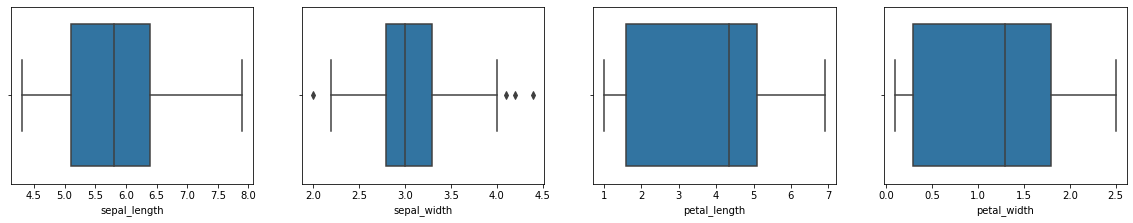

In [ ]:
plt.figure((figsize)=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data=iris,x='sepal_length')

plt.subplot(4,4,2)
sns.boxplot(data=iris,x='sepal_width')

plt.subplot(4,4,3)
sns.boxplot(data=iris,x='petal_length')

plt.subplot(4,4,4)
sns.boxplot(data=iris,x='petal_width')

As we can that sepal_leanth feature has outliers, so let's try to remove them

In [ ]:
iris['sepal_width']=iris['sepal_width'].clip(lower=iris['sepal_width'].quantile(0.1), upper=iris['sepal_width'].quantile(0.9))

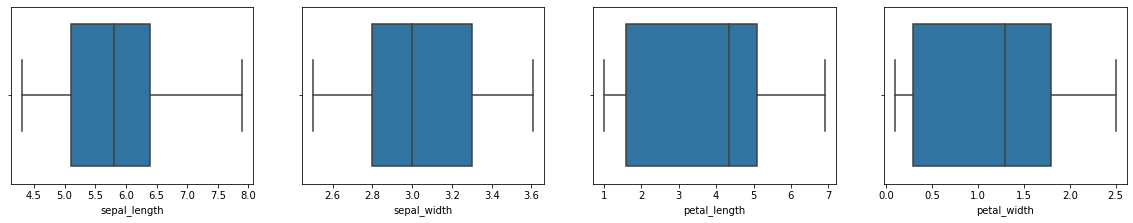

In [ ]:
plt.figure((figsize)=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data=iris,x='sepal_length')

plt.subplot(4,4,2)
sns.boxplot(data=iris,x='sepal_width')

plt.subplot(4,4,3)
sns.boxplot(data=iris,x='petal_length')

plt.subplot(4,4,4)
sns.boxplot(data=iris,x='petal_width')

Now,as we can see that all the outliers are gone,so now let's apply Label Encoding to the species feature 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
iris['species']=le.fit_transform(iris['species'])

In [ ]:
iris.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Seperating dependent and independent columns

In [ ]:
X = iris.drop(['species'],axis=1)
y = iris.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (120, 4)
y_train size:  (120,) 

X_test size: (30, 4)
y_test size: (30,)


Building our model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#accurate score
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])